In [1]:
import numpy as np
import pandas as pd
from numpy import sqrt, pi, exp
from scipy.stats import norm
from scipy.integrate import quad
import matplotlib.pyplot as plt
from matplotlib import patches
%matplotlib inline

precision = TP/(TP+FP)
recall    = TP/(TP+FN)
F1-score  = harm. mean (precision & recall)
          = 2*TP/(2*TP+FN+FP)
p(FP) - error type 1
p(FN) - error type 2


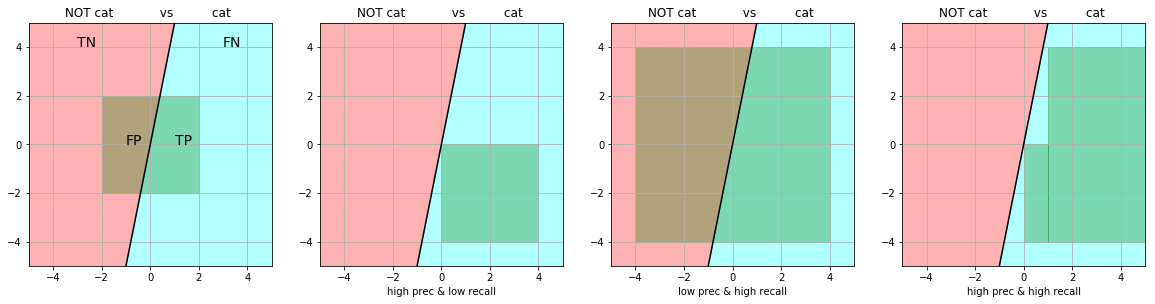

In [12]:
fig = plt.figure(figsize = (20,5))
ax1  = plt.subplot(1,4,1)
ax1 = plt.gca()
circle = patches.Rectangle((-2,-2), 4, 4,fill='True',color='green', alpha=0.3)
ax1.add_artist(circle)
ax1.plot([-10,10],[-50,50],color='black')
ax1.fill_between([-10,10], 5, [-50,50],color='red',label='TN',alpha=0.3)
ax1.fill_between([-10,10], -5, [-50,50],color='cyan',label='TN',alpha=0.3)
ax1.set_aspect(1.0)  # make aspect ratio square
ax1.set_title('NOT cat            vs          cat ')
ax1.text(-3,4,'TN',size=14)
ax1.text(3,4,'FN',size=14)

ax1.text(-1,0,'FP',size=14)
ax1.text(1,0,'TP',size=14)
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.grid()

ax2  = plt.subplot(1,4,2)
ax2 = plt.gca()
circle = patches.Rectangle((-0,-4), 4, 4,fill='True',color='green', alpha=0.3)
ax2.add_artist(circle)
ax2.plot([-10,10],[-50,50],color='black')
ax2.fill_between([-10,10], 5, [-50,50],color='red',label='TN',alpha=0.3)
ax2.fill_between([-10,10], -5, [-50,50],color='cyan',label='TN',alpha=0.3)
ax2.set_aspect(1.0)  # make aspect ratio square
ax2.set_title('NOT cat            vs          cat ')
ax2.set_xlabel('high prec & low recall')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.grid()

ax3  = plt.subplot(1,4,3)
ax3 = plt.gca()
circle = patches.Rectangle((-4,-4), 8, 8,fill='True',color='green', alpha=0.3)
ax3.add_artist(circle)
ax3.plot([-10,10],[-50,50],color='black')
ax3.fill_between([-10,10], 5, [-50,50],color='red',label='TN',alpha=0.3)
ax3.fill_between([-10,10], -5, [-50,50],color='cyan',label='TN',alpha=0.3)
ax3.set_aspect(1.0)  # make aspect ratio square
ax3.set_title('NOT cat            vs          cat ')
ax3.set_xlabel('low prec & high recall')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.grid()

ax4  = plt.subplot(1,4,4)
ax4 = plt.gca()
circle = patches.Rectangle((1,-4), 4, 8,fill='True',color='green', alpha=0.3)
ax4.add_artist(circle)
circle = patches.Rectangle((0, -4), 1, 4,fill='True',color='green', alpha=0.3)
ax4.add_artist(circle)
ax4.plot([-10,10],[-50,50],color='black')
ax4.fill_between([-10,10], 5, [-50,50],color='red',label='TN',alpha=0.3)
ax4.fill_between([-10,10], -5, [-50,50],color='cyan',label='TN',alpha=0.3)
ax4.set_aspect(1.0)  # make aspect ratio square
ax4.set_title('NOT cat            vs          cat ')
ax4.set_xlabel('high prec & high recall')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.grid()

print('precision = TP/(TP+FP)')
print('recall    = TP/(TP+FN)')
print('F1-score  = harm. mean (precision & recall)')
print('          = 2*TP/(2*TP+FN+FP)')
print('p(FP) - error type 1')
print('p(FN) - error type 2')

Text(0.5, 1.0, 'ROC curve')

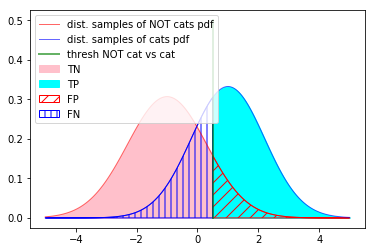

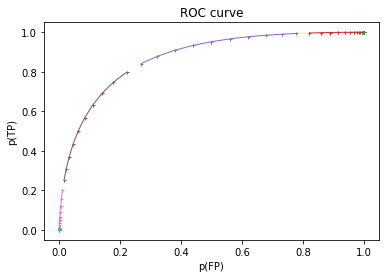

In [31]:
mu1, sigma1 = -1.0, 1.3
mu2, sigma2 =  1.0, 1.2
thresh = 0.5

def dist(x, a, b):
    return exp(-(x-a)*(x-a)/2/b/b)/sqrt(2*pi)/b   #norm.pdf(x,a,b)

fig, ax = plt.subplots(1, 1)

x = np.linspace(-5,5, 100)
x_left = np.linspace(-5     ,thresh, 100)
x_right = np.linspace(thresh,5     , 100)
f1_left  = dist(x_left,mu1,sigma1)
f1_right = dist(x_right,mu1,sigma1)
f2_left  = dist(x_left,mu2,sigma2)
f2_right = dist(x_right,mu2,sigma2)

ax.plot(x_left, f1_left,'r-', lw=1, alpha=0.6, label='dist. samples of NOT cats pdf')
ax.fill_between(x_left, 0, f1_left,color='pink',label='TN')
ax.plot(x_right, f1_right,'r-', lw=1, alpha=0.6)

ax.plot(x_left, f2_left,'b-', lw=1, alpha=0.6, label='dist. samples of cats pdf')
ax.plot(x_right, f2_right,'b-', lw=1, alpha=0.6)
ax.fill_between(x_right, 0, f2_right,color='cyan',label='TP')

ax.fill_between(x_right, 0, f1_right, hatch='//', edgecolor='red',facecolor='none',label='FP')
ax.fill_between(x_left,  0, f2_left, hatch='||', edgecolor='blue',facecolor='none',label='FN')

ax.plot([thresh,thresh], [0,0.5], 'g-', lw=2, alpha=0.6,label='thresh NOT cat vs cat')
ax.legend()

fp = []
tp = []
fig, ax = plt.subplots(1, 1)

for thresh in np.arange(-10,10,0.2):
    samples = 1
    #TN = samples*quad(dist, -np.inf, thresh, args=(mu1,sigma1))[0]
    TP = samples*quad(dist,  thresh, np.inf, args=(mu2,sigma2))[0]
    FP = samples*quad(dist,  thresh, np.inf, args=(mu1,sigma1))[0]
    #FN = samples*quad(dist, -np.inf, thresh, args=(mu2,sigma2))[0]
    fp.append(FP)
    tp.append(TP)
    
ax.plot(fp[0:10],tp[0:10],marker='+',markersize=3,lw=1)
ax.plot(fp[10:20],tp[10:20],marker='+',markersize=3,lw=1)
ax.plot(fp[20:30],tp[20:30],marker='+',markersize=3,lw=1)
ax.plot(fp[30:40],tp[30:40],marker='+',markersize=3,lw=1)
ax.plot(fp[40:50],tp[40:50],marker='+',markersize=3,lw=1)
ax.plot(fp[50:60],tp[50:60],marker='+',markersize=3,lw=1)
ax.plot(fp[60:70],tp[60:70],marker='+',markersize=3,lw=1)
ax.plot(fp[70:80],tp[70:80],marker='+',markersize=3,lw=1)
ax.plot(fp[80:90],tp[80:90],marker='+',markersize=3,lw=1)
ax.plot(fp[90:100],tp[90:100],marker='+',markersize=3,lw=1)
ax.set_xlabel('p(FP)')
ax.set_ylabel('p(TP)')
ax.set_title('ROC curve')